In [16]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt

In [17]:
def sample(mu,cov,theta,errorVar,numPoints = 1000000):
    points = np.random.multivariate_normal(mu,cov,numPoints)
    points = np.concatenate([np.ones(points.shape[0]).reshape(points.shape[0],1),(points),],axis = 1)
    val = np.matmul(points,theta)
    val = (val.reshape(val.shape[0]) + np.random.normal(0,np.sqrt(errorVar),numPoints)).reshape(val.shape[0],1)
    return val, points #returning points including 1 for theta0

In [18]:
mu = np.array([3,-1])
cov = np.array([[4,0],[0,4]])
theta = np.array([[3],[1],[2]])
Y,X = sample(mu,cov,theta,2)

In [19]:
def gradient(X,Y,theta):
    #print(X.shape)
    #print(Y.shape)
    #print(theta.shape)
    return ((np.matmul(X.T,(np.matmul(X,theta)-Y))))/(2*X.shape[0])

def loss(X,Y,theta):
    return np.square(np.linalg.norm(Y -np.matmul(X,theta)))/(2*X.shape[0])

def SGD(X,Y,batch_size = 1, lr = 0.001, stopThresh = 1e-7):

    #shuffling 
    dat = np.concatenate([Y,X],axis = 1)
    np.random.shuffle(dat)
    #assuming batch_size divides tot_examples
    ex,dim = dat.shape
    num_batches = ex//batch_size
    data_batched = dat.reshape((num_batches,batch_size,dim))

    #shape converted from (tot_examples,dim) -> (num_batches,batch_size,dim) s.t. num_batches*batch_size = tot_examples
    theta = np.array([[0],[0],[0]])
    curr_loss = 1; prev_loss = 0
    epochs = 0
    t = time.time()
    thetaMov = [(theta[0][0],theta[1][0],theta[2][0])]
    while abs(curr_loss-prev_loss)>stopThresh:
        net_loss = 0
        for batch in data_batched :
            Y = batch[:,0]; X = batch[:,1:]
            Y = Y.reshape(Y.shape[0],1)
            theta = theta - lr*gradient(X,Y,theta)
            thetaMov.append((theta[0][0],theta[1][0],theta[2][0]))
            net_loss += loss(X,Y,theta)

        net_loss /= num_batches
        prev_loss = curr_loss
        curr_loss = net_loss
        epochs += 1
    print(time.time()-t)
    print(epochs)
    return theta,np.array(thetaMov).T

In [20]:
#1, 100, 10000, 1000000
sgd1,mov1 = SGD(X,Y,1,lr = 0.001,stopThresh=1e-7)
print(sgd1)

84.42449998855591
3
[[3.02319698]
 [0.97836492]
 [2.02194238]]


In [21]:
#1, 100, 10000, 1000000
sgd100,mov100 = SGD(X,Y,100,lr = 0.001,stopThresh=1e-7)
print(sgd100)

2.2594051361083984
7
[[2.99889159]
 [1.00047573]
 [2.00158016]]


In [22]:
#1, 100, 10000, 1000000
sgd10000,mov10000 = SGD(X,Y,10000,lr = 0.001,stopThresh=1e-7)
print(sgd10000)

6.72312593460083
466
[[2.99307483]
 [1.00172197]
 [1.99925055]]


In [23]:
#1, 100, 10000, 1000000
sgd1000000,mov1000000 = SGD(X,Y,1000000,lr = 0.001,stopThresh=1e-7)
print(sgd10000)

500.3315279483795
29490
[[2.99307483]
 [1.00172197]
 [1.99925055]]


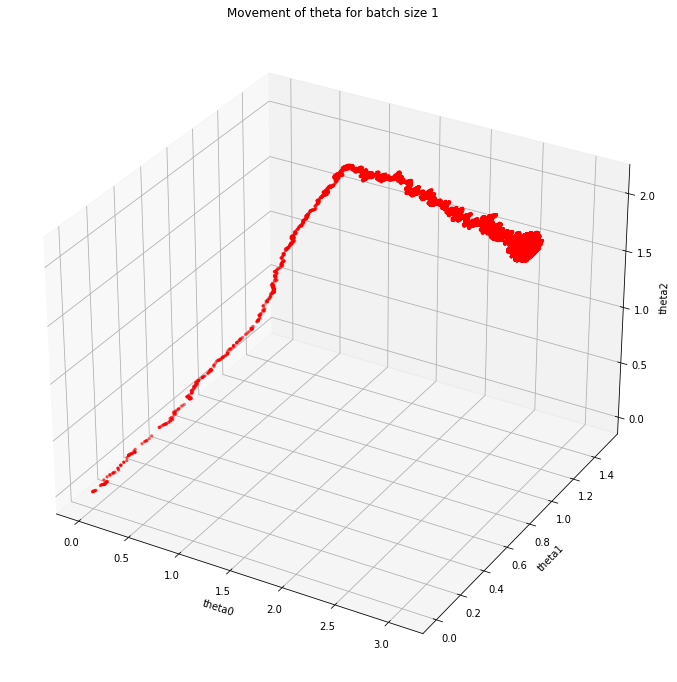

In [24]:
fig = plt.figure(figsize=(20,12))
axes = fig.add_subplot(title='3D Mesh', projection='3d',
                               xlabel='theta0', ylabel='theta1',
                               zlabel='theta2')
axes.scatter(mov1[:,0:-1][0],mov1[:,0:-1][1],mov1[:,0:-1][2], marker='o', c='red', s=5)
axes.scatter(mov1.T[-1][0],mov1.T[-1][1],mov1.T[-1][2],marker = 'X',c = 'blue',s = 100)
plt.title('Movement of theta for batch size 1')
plt.show()
fig.savefig('movementBatch1.png')

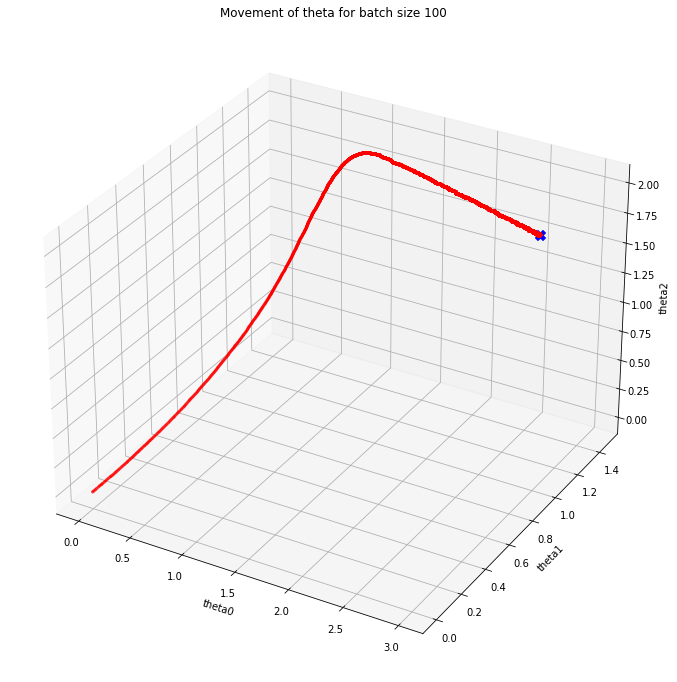

In [25]:
fig = plt.figure(figsize=(20,12))
axes = fig.add_subplot(title='3D Mesh', projection='3d',
                               xlabel='theta0', ylabel='theta1',
                               zlabel='theta2')
axes.scatter(mov100[:,0:-1][0],mov100[:,0:-1][1],mov100[:,0:-1][2], marker='o', c='red', s=5)
axes.scatter(mov100.T[-1][0],mov100.T[-1][1],mov100.T[-1][2],marker = 'X',c = 'blue',s = 100)
plt.title('Movement of theta for batch size 100')
plt.show()
fig.savefig('movementBatch100.png')

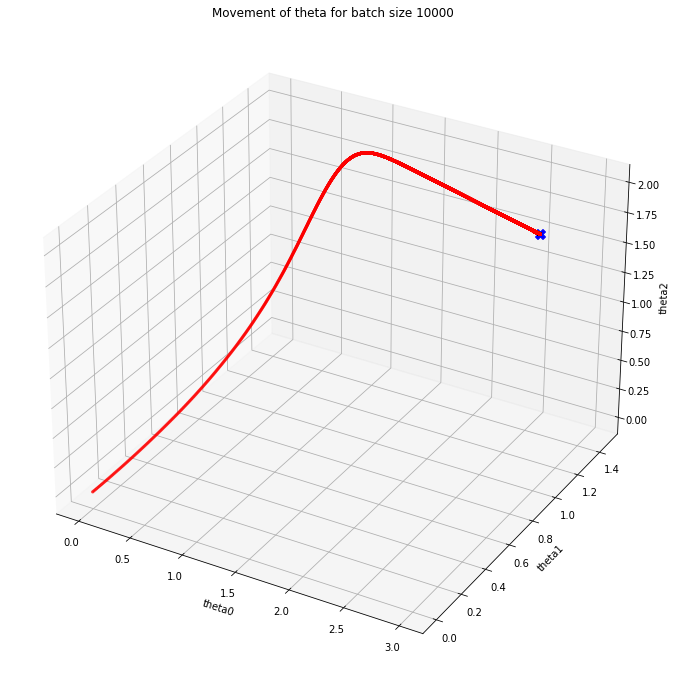

In [26]:
fig = plt.figure(figsize=(20,12))
axes = fig.add_subplot(title='3D Mesh', projection='3d',
                               xlabel='theta0', ylabel='theta1',
                               zlabel='theta2')
axes.scatter(mov10000[0],mov10000[1],mov10000[2], marker='o', c='red', s=5)
axes.scatter(mov10000.T[-1][0],mov10000.T[-1][1],mov10000.T[-1][2],marker = 'X',c = 'blue',s = 100)
plt.title('Movement of theta for batch size 10000')
plt.show()
fig.savefig('movementBatch10000.png')

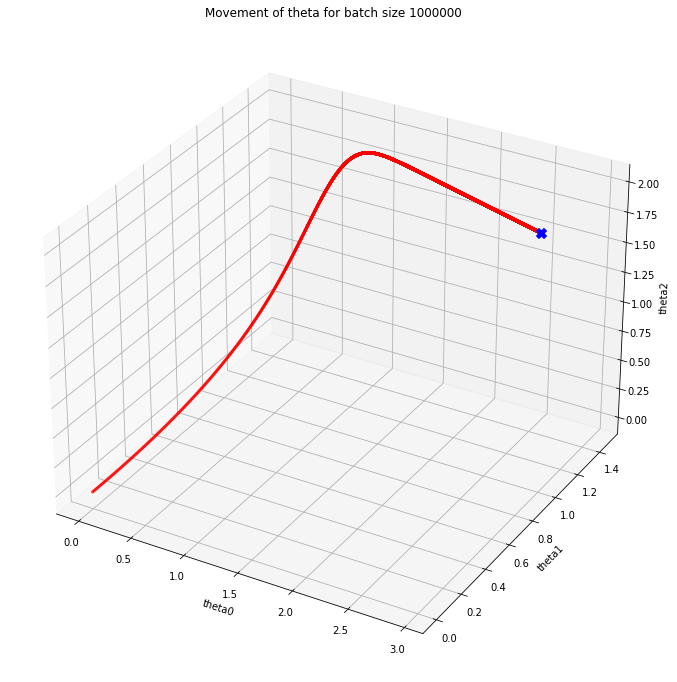

In [27]:
fig = plt.figure(figsize=(20,12))
axes = fig.add_subplot(title='3D Mesh', projection='3d',
                               xlabel='theta0', ylabel='theta1',
                               zlabel='theta2')
axes.scatter(mov1000000[0],mov1000000[1],mov1000000[2], marker='o', c='red', s=5)
axes.scatter(mov1000000.T[-1][0],mov1000000.T[-1][1],mov1000000.T[-1][2],marker = 'X',c = 'blue',s = 100)
plt.title('Movement of theta for batch size 1000000')
plt.show()
fig.savefig('movementBatch1000000.png')

In [28]:
test_data = pd.read_csv('data/q2/q2test.csv')

In [29]:
test_data = pd.read_csv('data/q2/q2test.csv')
testY = np.array(test_data['Y']).reshape(len(test_data),1)
testX =np.array([np.ones(len(testY)),test_data['X_1'],test_data['X_2']]).T
print(loss(testX,testY,sgd1))
print(loss(testX,testY,sgd100))
print(loss(testX,testY,sgd10000))
print(loss(testX,testY,sgd1000000))
print(loss(testX,testY,np.array([[3],[1],[2]])))

1.0293589650134412

0.9828461951755985

0.983171206185912

0.9912376978230081

0.9829469215000003